# 911 Calls Analysis

I will be analyzing some 911 calls data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### Import libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Reading the Data

In [ ]:
df = pd.read_csv('911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### _What are the top 5 zipcodes for 911 calls?_

In [ ]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### _What are the top 5 townships (twp) for 911 calls?_

In [ ]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### _How many unique title codes exist in the titles column and what are they?_

In [ ]:
df['title'].nunique()

110

In [ ]:
print(df['title'].unique())

['EMS: BACK PAINS/INJURY' 'EMS: DIABETIC EMERGENCY' 'Fire: GAS-ODOR/LEAK'
 'EMS: CARDIAC EMERGENCY' 'EMS: DIZZINESS' 'EMS: HEAD INJURY'
 'EMS: NAUSEA/VOMITING' 'EMS: RESPIRATORY EMERGENCY'
 'EMS: SYNCOPAL EPISODE' 'Traffic: VEHICLE ACCIDENT -'
 'EMS: VEHICLE ACCIDENT' 'Traffic: DISABLED VEHICLE -'
 'Fire: APPLIANCE FIRE' 'EMS: GENERAL WEAKNESS'
 'Fire: CARBON MONOXIDE DETECTOR' 'EMS: UNKNOWN MEDICAL EMERGENCY'
 'EMS: UNRESPONSIVE SUBJECT' 'Fire: VEHICLE ACCIDENT'
 'EMS: ALTERED MENTAL STATUS' 'Fire: FIRE ALARM' 'EMS: CVA/STROKE'
 'Traffic: ROAD OBSTRUCTION -' 'EMS: SUBJECT IN PAIN' 'EMS: HEMORRHAGING'
 'EMS: FALL VICTIM' 'EMS: ASSAULT VICTIM' 'EMS: SEIZURES'
 'EMS: MEDICAL ALERT ALARM' 'EMS: ABDOMINAL PAINS' 'Fire: PUMP DETAIL'
 'Fire: FIRE INVESTIGATION' 'EMS: OVERDOSE' 'EMS: MATERNITY'
 'EMS: UNCONSCIOUS SUBJECT' 'EMS: CHOKING' 'EMS: LACERATIONS'
 'Fire: TRASH/DUMPSTER FIRE' 'Fire: UNKNOWN TYPE FIRE'
 'Fire: BUILDING FIRE' 'Fire: ELECTRICAL FIRE OUTSIDE'
 'Fire: DEBRIS/FLUIDS ON HIGH

### Extracting new information from existing column into a new column called "Reason" using .apply() with a custom lambda expression

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### _What is the most common Reason for a 911 call based off of this new column?_

In [ ]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Creating a countplot of 911 calls by Reason using seaborn.

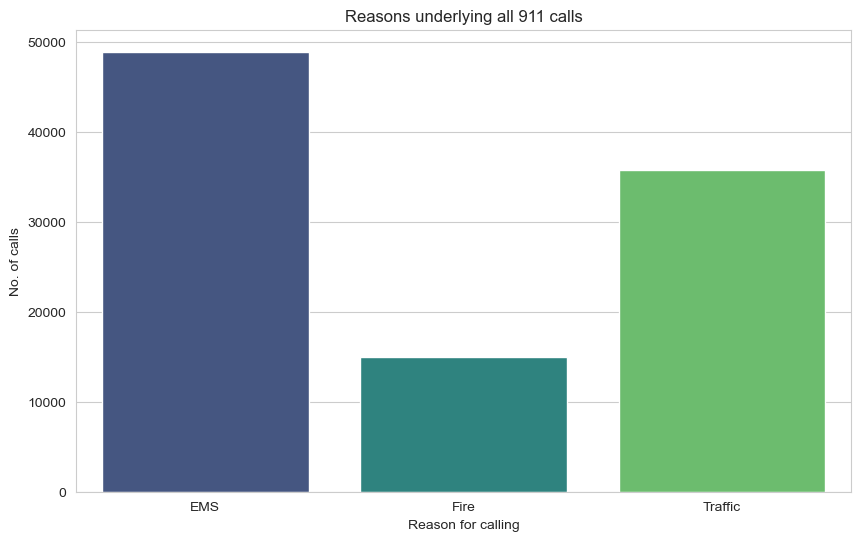

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Reason',data=df,palette='viridis')

plt.xlabel('Reason for calling')
plt.ylabel('No. of calls')
plt.title('Reasons underlying all 911 calls')


plt.savefig('a.png')

#### - _Most common reason for 911 calls is associated with Emergency Medical Services (EMS)._

### Working with time information in the data.

In [ ]:
type(df['timeStamp'].iloc[0])

str

### Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert timeStamp from strings to DateTime objects.

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Extracting specific attributes (Hour, Month, and Day of Week) from a timeStamp column(DateTime objects) into 3 new columns - Hour, Month, and Day of Week - using .apply().

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [ ]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


### Creating a countplot of the Day of Week column.

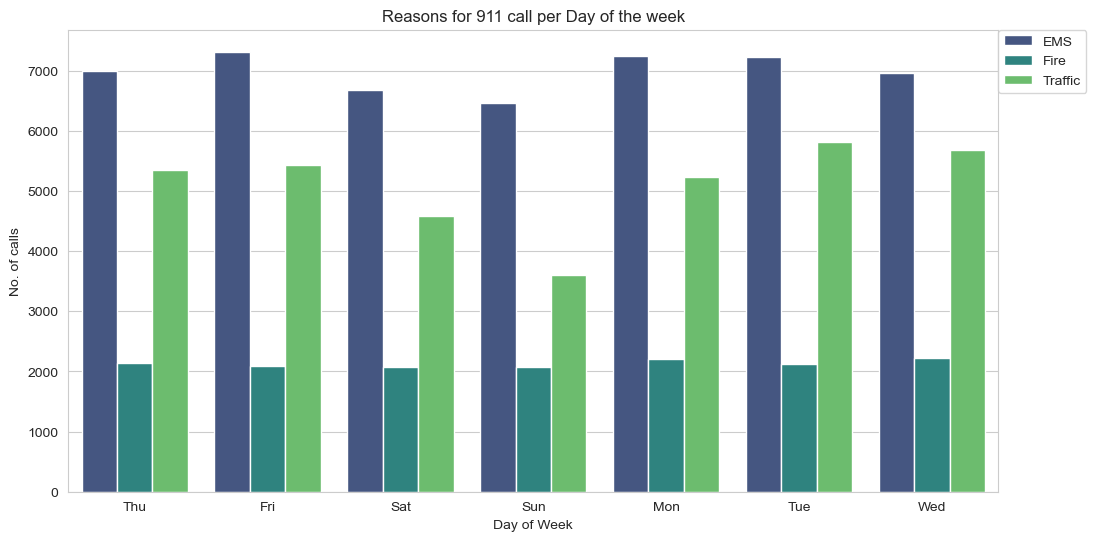

In [ ]:
fig = plt.figure(figsize=(12,6))
sns_plot=sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.title('Reasons for 911 call per Day of the week')
plt.ylabel('No. of calls')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # To relocate the legend

plt.savefig('fig01.png')

### Creating a countplot of the Month column.

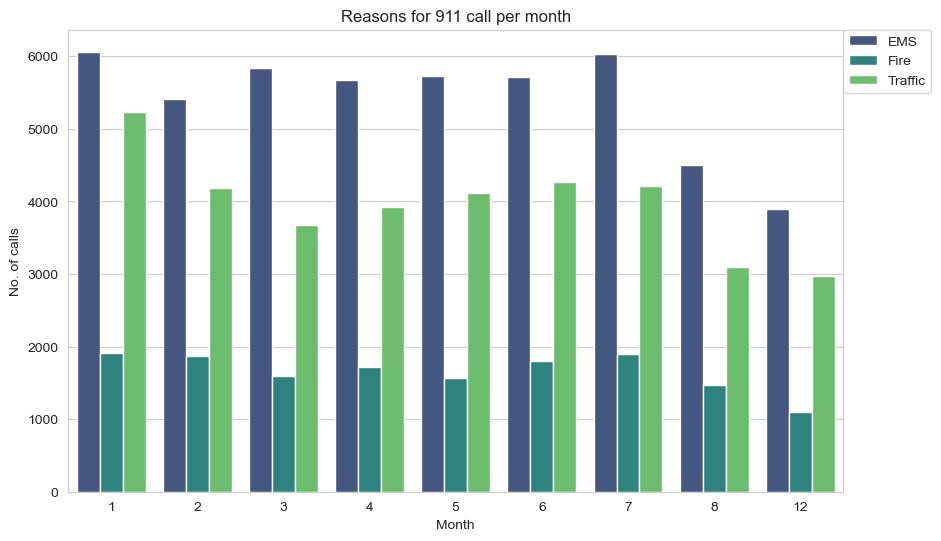

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.title('Reasons for 911 call per month')
plt.ylabel('No. of calls')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # To relocate the legend
plt.savefig('b.png')

#### - _We notice months 9,10, and 11 are missing._

#### - _Filling in this information by plotting the information in another way, possibly in a simple line plot that fills in the missing months._

### _Creating a groupby object called byMonth, grouping the DataFrame by the month column and use the count() method for aggregation._

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Creating a simple plot off of the dataframe indicating the count of calls per month.

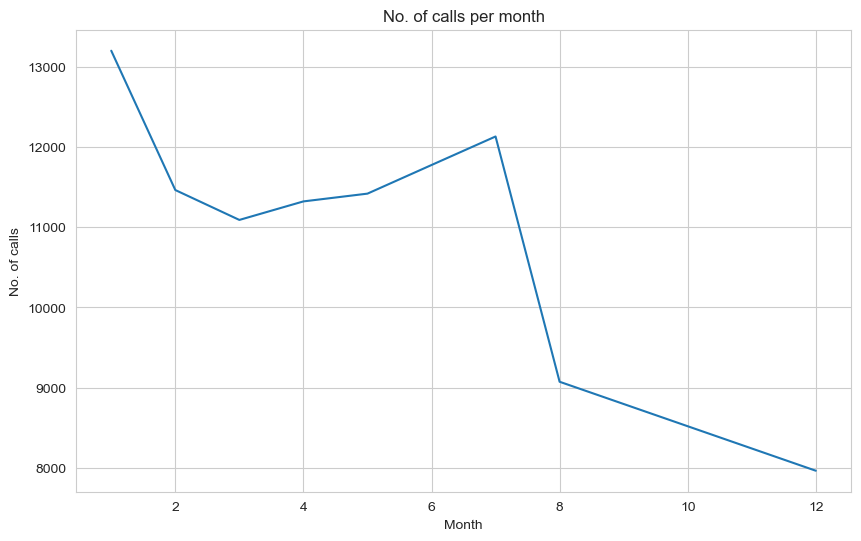

In [ ]:
fig = plt.figure(figsize=(10,6))
byMonth['twp'].plot()
plt.ylabel('No. of calls')
plt.title('No. of calls per month')
plt.savefig('c.png')

### Using seaborn's lmplot() to create a linear fit on the number of calls per month.

<Figure size 1000x600 with 0 Axes>

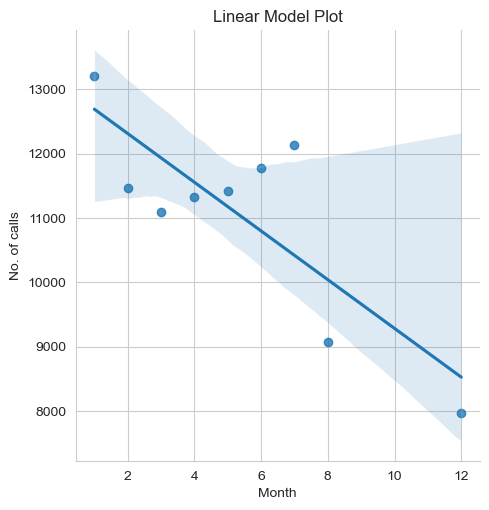

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.ylabel('No. of calls')
plt.title('Linear Model Plot')
plt.savefig('d.png')

#### - _The total number of calls keeps decreasing from months 1 to 12._

#### - _The shaded area represents the standard error which increases because of missing data between months 8 and 12 (as seen above)._

### Creating a new column called 'Date' that contains the date from the timeStamp column by using the .date() method.

In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


### Creating a plot of counts of 911 calls by grouping the Date column with the count() aggregate.

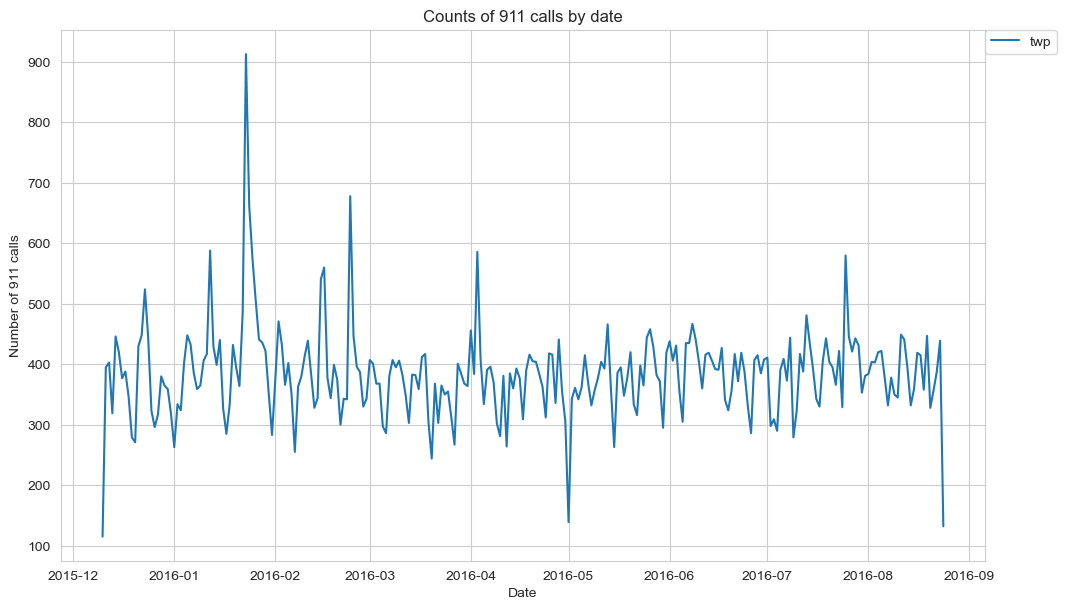

In [ ]:
fig = plt.figure(figsize=(10,6))
df.groupby('Date').count()['twp'].plot(figsize=(10,6)) #total
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.ylabel('Number of 911 calls')
plt.title('Counts of 911 calls by date')
plt.savefig('fig03.png')

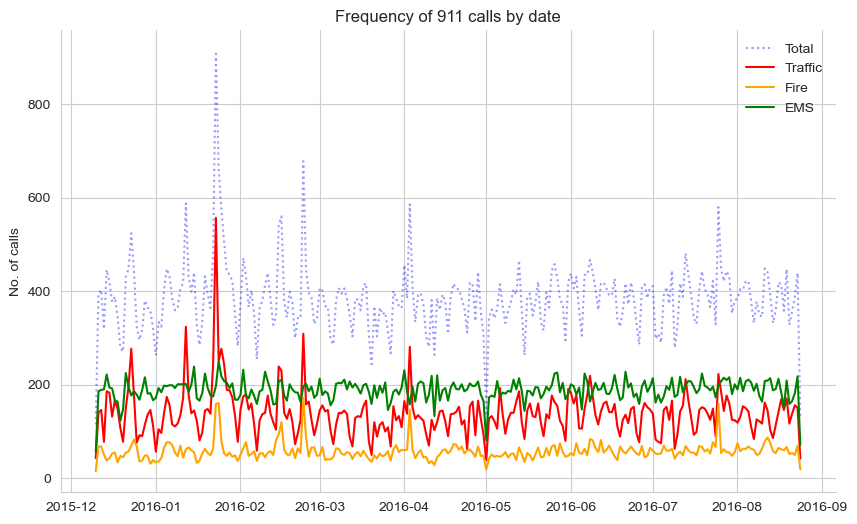

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df.groupby('Date').count()['twp'],        # line plot of gdp vs. time
        color='blue',                   # set the line color to red
       label = 'Total',
        linestyle = ':',
        alpha = 0.4
       )

ax.plot(df[df['Reason']=='Traffic'].groupby('Date').count()['twp'],        # line plot of gdp vs. time
        color='red',                   # set the line color to red
       label = 'Traffic'
       )

ax.plot(df[df['Reason']=='Fire'].groupby('Date').count()['twp'],        # line plot of gdp vs. time
        color='orange',                   # set the line color to red
       label = 'Fire'
       )

ax.plot(df[df['Reason']=='EMS'].groupby('Date').count()['twp'],        # line plot of gdp vs. time
        color='green',                   # set the line color to red
       label = 'EMS'
       )

ax.legend(frameon=False)                           # Show the legend. frameon=False kills the box around the legend

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.set_ylabel('No. of calls')  # add the y-axis label

ax.set_title('Frequency of 911 calls by date')

plt.savefig('e.png')

plt.show()

#### - _It is interesting to note that a peak or trough in the total calls curve reflects a peak or trough in all the underlying reasons curves with Traffic being the driving force behind such a trend._

### Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week by using groupby in combination with unstack method.

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### Creating HeatMap with restructured dataframe to analyze corelations in the data.

<Axes: xlabel='Hour', ylabel='Day of Week'>

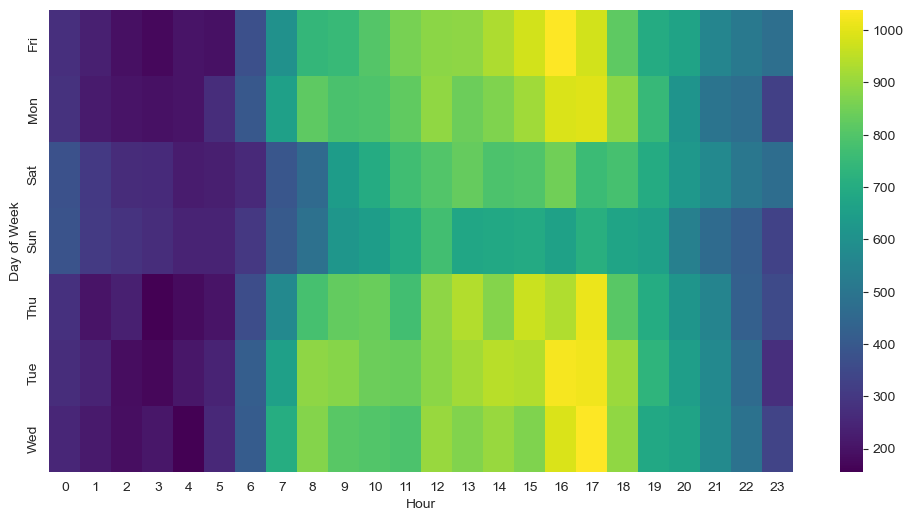

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

### Creating a clustermap.

<Figure size 1000x600 with 0 Axes>

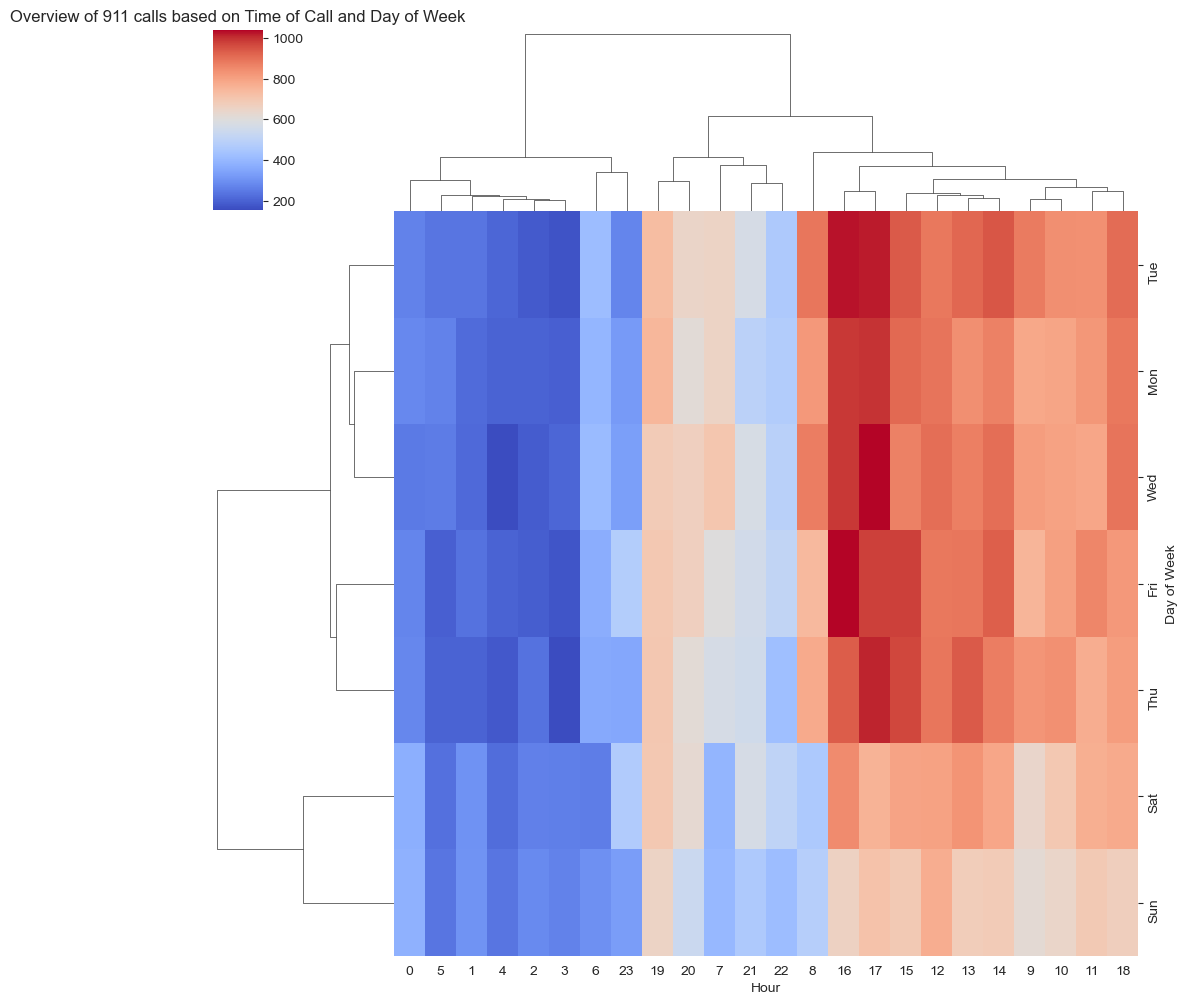

In [ ]:
fig = plt.figure(figsize=(10,6))

sns.clustermap(dayHour,cmap='coolwarm')

plt.title('Overview of 911 calls based on Time of Call and Day of Week', loc='center')

plt.savefig('f.png')

#### - _Data indicated 911 calls are least likely to be made during hours 0 to 5 i.e. midnight till 5 AM throughout the week but the proportion of such calls made is higher during the weekend than on weekdays._

#### - _Overall, the proportion of 911 calls made on weekdays is more than on the weekends with a majority of them being made between 9 AM and 6 PM._

#### - _On the x-axis (top): Levels of hierarchical clustering based on similarities in the elements of the rows represented by the tree diagram._

#### - _On the y-axis (left): Hierarchical clustering based on similarities in the elements of the columns represented by the tree diagram._

# Thank you for exploring this dataset with me!

#### Feel free to check out my data portfolio on my <a href="https://awakekho.github.io/Home.html">personal website</a>. You can also find me <a href="https://www.linkedin.com/in/awake-khobragade/"> (here) on LinkedIn</a>